## ¿Me concederán la tarjeta?

Los bancos comerciales reciben muchas solicitudes de tarjetas de crédito. Muchos de ellos son rechazados por muchas razones, como saldos elevados de préstamos, bajos niveles de ingresos  por ejemplo. El análisis manual de estas aplicacionespropenso a errores y requiere mucho tiempo . Afortunadamente, esta tarea se puede automatizar con el poder del aprendizaje automático y prácticamente todos los bancos comerciales lo hacen hoy en día. En este proyecto, construiremos un predictor automático de aprobación de tarjetas de crédito utilizando técnicas de aprendizaje automático que hemos trabajado anteriormente (Regresión logísitica y KNN), tal como lo hacen los bancos reales.

## INSPECCIÓN DEL DATASET

Carga el Dataset del moodle e inspecciona los valores ( es normal que te resulte confuso)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Tu codigo
df_tarjeta = pd.read_csv('dataCredit.csv',sep=";")
df_tarjeta.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,b,30.83,0,u,g,w,v,125,t,t,1,f,g,00202,0,+
1,a,58.67,446,u,g,q,h,304,t,t,6,f,g,00043,560,+
2,a,24.50,5,u,g,q,h,15,t,f,0,f,g,00280,824,+
3,b,27.83,154,u,g,w,v,375,t,t,5,t,g,00100,3,+
4,b,20.17,5625,u,g,w,v,171,t,f,0,f,s,00120,0,+


Al ser datos privados los han capados, pero 'feta la llei, feta la trampa', tenemos este [blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) que nos da una idea de a que campos se pueden referir: Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income y finalmente el ApprovalStatus.

Se mezclan tanto campos numéricos como textos, así que seguramente vamos a tener que hacer algunas transformaciones:

In [3]:
# Analiza la info del dataset (tamaño y tipos de columnas)
df_tarjeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column1   690 non-null    object
 1   Column2   690 non-null    object
 2   Column3   690 non-null    int64 
 3   Column4   690 non-null    object
 4   Column5   690 non-null    object
 5   Column6   690 non-null    object
 6   Column7   690 non-null    object
 7   Column8   690 non-null    int64 
 8   Column9   690 non-null    object
 9   Column10  690 non-null    object
 10  Column11  690 non-null    int64 
 11  Column12  690 non-null    object
 12  Column13  690 non-null    object
 13  Column14  690 non-null    object
 14  Column15  690 non-null    int64 
 15  Column16  690 non-null    object
dtypes: int64(4), object(12)
memory usage: 86.4+ KB


In [4]:
# Analiza la descripción estadísitca de los campos numéricos del dataset (saca alguna conclusió TIP: fijate en la escalas)
df_tarjeta.describe()

,Column3,Column8,Column11,Column15
count,690.000000,690.000000,690.00000,690.000000
mean,1187.315942,453.366667,2.40000,1017.385507
std,3069.110042,1387.900324,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,15.000000,5.000000,0.00000,0.000000
50%,125.000000,35.000000,0.00000,5.000000
75%,665.000000,219.750000,3.00000,395.500000
max,26335.000000,14415.000000,67.00000,100000.000000


## Tratamiento de valores Nulos

Normalmente cuando faltan campos en un dataset se suele dejar vacío, lo que equivale a introducir el valor NaN, en algunos casos como en este ejemplo, podemos observar como en alguna variable categorica envez de de dejarlo vacío han puesto ?.

In [5]:
# Observa si hay columnas que contengan valor ?
df_tarjeta.isin(['?']).any()

Column1      True
Column2      True
Column3     False
Column4      True
Column5      True
Column6      True
Column7      True
Column8     False
Column9     False
Column10    False
Column11    False
Column12    False
Column13    False
Column14     True
Column15    False
Column16    False
dtype: bool

In [6]:
# Reemplaza el valor ? por un (NaN)
df_tarjeta.replace('?',np.nan, inplace=True)

In [7]:
#Muestra la cantidad de NaN
df_tarjeta.isnull().sum()

Column1     12
Column2     12
Column3      0
Column4      6
Column5      6
Column6      9
Column7      9
Column8      0
Column9      0
Column10     0
Column11     0
Column12     0
Column13     0
Column14    13
Column15     0
Column16     0
dtype: int64

Para tratar los NaN values hay una serie de técnicas, desde descartarlos, o en nuestro caso los vamos a rellenar con el valor medio:

In [8]:
# Rellena los NaN Values con el valor medio y muestra el número de NaN
df_tarjeta.fillna(df_tarjeta.mean)
df_tarjeta.isnull().sum()

Column1     12
Column2     12
Column3      0
Column4      6
Column5      6
Column6      9
Column7      9
Column8      0
Column9      0
Column10     0
Column11     0
Column12     0
Column13     0
Column14    13
Column15     0
Column16     0
dtype: int64

Como puede ver siguen habiendo NaN, tiene sentido debido a que en las variables categóricas no se ha podido imputar ninguna valor medio. Trata los campos categóricos para substuir los valores NaN por el valor que se da más veces. (Te va a costar haciendo un for (aunque tiene nivel para hacerlo), puedes optar por hacerlo uno a uno)

In [9]:
# Tu codigo
df_tarjeta['Column1'] = df_tarjeta['Column1'].fillna(df_tarjeta['Column1'].mode()[0])
df_tarjeta['Column2'] = df_tarjeta['Column2'].fillna(df_tarjeta['Column2'].mode()[0])
df_tarjeta['Column4'] = df_tarjeta['Column4'].fillna(df_tarjeta['Column4'].mode()[0])
df_tarjeta['Column5'] = df_tarjeta['Column5'].fillna(df_tarjeta['Column5'].mode()[0])
df_tarjeta['Column6'] = df_tarjeta['Column6'].fillna(df_tarjeta['Column6'].mode()[0])
df_tarjeta['Column7'] = df_tarjeta['Column7'].fillna(df_tarjeta['Column7'].mode()[0])
df_tarjeta['Column14'] = df_tarjeta['Column14'].fillna(df_tarjeta['Column14'].mode()[0])
#Muestra ahora el número de NaN
df_tarjeta.isnull().sum()

Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
dtype: int64

## Preprocesado de datos

Lo primero que debemos hacer es separar en nuestra variable explicativa y nuestra variable target

<Axes: >

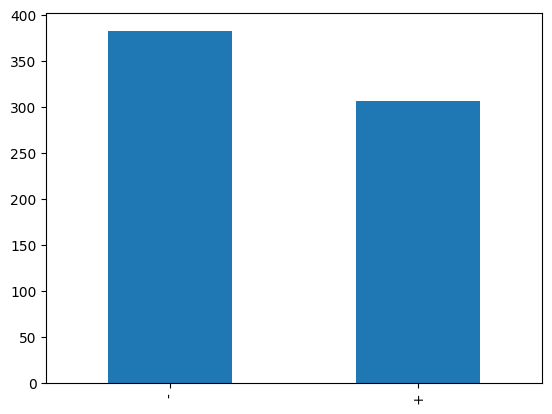

In [10]:
# Separa en dos df distintos
X = df_tarjeta.drop(columns=['Column16'])

y = df_tarjeta['Column16']

# De la variable target muestra gáficamente (barras), una comparación entre las tarjetas aprobadas y las que no.
df_tarjeta['Column16'].value_counts().plot(kind='bar')



No tener las variables del mismo tipo, da problemas tanto en tiempos de ejecución como en el resultado depende del modelo a aplicar. Así que transformemos la vairable categóricas en numéricas:
Puedes usar el [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) o el [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) 

In [11]:
# Transforma variable y muestra dataset
from sklearn.preprocessing import LabelEncoder

for cc in df_tarjeta.columns:
    if df_tarjeta[cc].dtype == type(object):
        le = LabelEncoder()
        df_tarjeta[cc] = le.fit_transform(df_tarjeta[cc])

df_tarjeta.apply(LabelEncoder().fit_transform)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,1,156,0,1,0,12,7,35,1,1,1,0,0,68,0,0
1,0,328,79,1,0,10,3,54,1,1,6,0,0,11,119,0
2,0,89,5,1,0,10,3,14,1,0,0,0,0,96,140,0
3,1,125,51,1,0,12,7,58,1,1,5,1,0,31,3,0
4,1,43,158,1,0,12,7,42,1,0,0,0,2,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,52,175,2,2,4,3,35,0,0,0,0,0,90,0,1
686,0,71,35,1,0,1,7,2,0,1,2,1,0,67,106,1
687,0,97,48,2,2,5,2,2,0,1,1,1,0,67,1,1
688,1,20,60,1,0,0,7,4,0,0,0,0,0,96,134,1


## Separamos en train y test

In [12]:
# Mediante train_test_split separa las dos variable (un 30% de test y pon random_state=2 para que podamos comparar resultados)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_tarjeta.drop(columns=['Column16']),df_tarjeta['Column16'],test_size=0.3,random_state=2)

#Aplicamos ML

## Logistic regresion

Usa la libreria de scikit-learn para regresión logística. Ten en cuenta que las variable no están escaladas y en la regresión logística te afectará.


In [13]:
# Escala las varaibles de entramiento con MinMaxEscale y almacenalas en una variable nueva
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_sd= scaler.fit_transform(x_train)
x_test_sd= scaler.fit_transform(x_test)

y_train_sd = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_sd = scaler.fit_transform(y_test.values.reshape(-1,1))

In [14]:
# Entrena el modelo con las variables escaladas
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train_sd,y_train_sd)
reg.score(x_test_sd,y_test_sd)


0.6123530319335626

In [15]:
# Muestra accuracy haciendo Cross validation (5 veces es suficiente)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, df_tarjeta.drop(columns=['Column16']), df_tarjeta['Column16'], cv=5)
print(scores)

[-0.19748546  0.06578158 -0.50827966  0.42121336  0.6683625 ]


### KNN

In [23]:
# Mediante GridSearch determina el número de vecinos optimos ( ya no hace falta usar variables escaladas)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param = {'n_neighbors': np.arange(1,15)}
knn_gs = GridSearchCV(knn,param,cv=30)



In [24]:
# Entrena el modelo
knn_gs.fit(x_train,y_train)

GridSearchCV(cv=30, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [25]:
# Muestra su accuracy
knn_gs.best_score_


0.6850490196078431

In [27]:
# Muestra accuracy haciendo Cross validation (5 veces es suficiente)
accuracy = cross_val_score(knn_gs, x_train, y_train, cv=5, scoring='accuracy').mean()

print(accuracy)

0.6915163230240551


## Conclusiones

Determina el mejor modelo y guardatelo para futuros análisis y atender las peticiones futuras de usuarios que quieren tarjetas de créditos. (Brutal el proyecto)

In [29]:
#Exporta modelo
import joblib

filename = 'knn_model.sav'
joblib.dump(knn_gs, filename)

#cargar
loaded_model = joblib.load(filename)